In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats as st
import math
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()
#it gives us first 5 rows of dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [5]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=6607, step=1)

In [7]:
df.isnull().sum()
#check the null values in our dataset and gives the sum of null values  

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
df.dropna()
#we can remove the rows which contains null value
#it doesn't change our original dataset but return a copy 
#for changes in original dataset we can use this command 
#df.dropna(inplace=True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [9]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
#we can handle the null values with fillna command
#here the three columns contain catagorical dataset so it is easy to drop them 
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [12]:
df.info

<bound method DataFrame.info of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_

In [13]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


#UNIVARIATE ANLYSIS
#(1) Categorical

In [14]:
df['Parental_Involvement'].value_counts()

Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

<Axes: ylabel='count'>

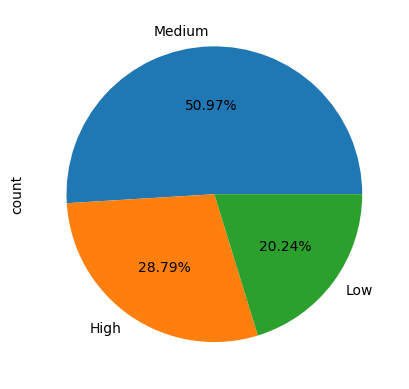

In [15]:
df['Parental_Involvement'].value_counts().plot(kind='pie',autopct="%1.2f%%")
#it shows that 50.97% students have medium parental involvement

<Axes: ylabel='count'>

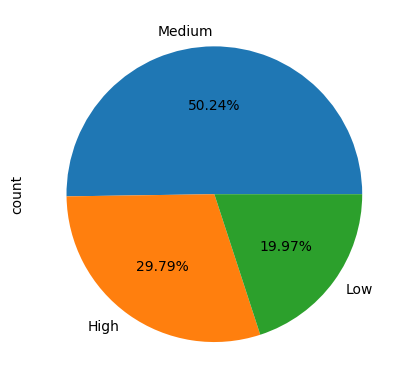

In [16]:
df['Access_to_Resources'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<Axes: ylabel='count'>

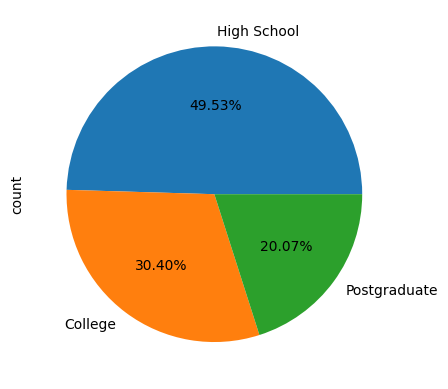

In [17]:
df['Parental_Education_Level'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<Axes: ylabel='count'>

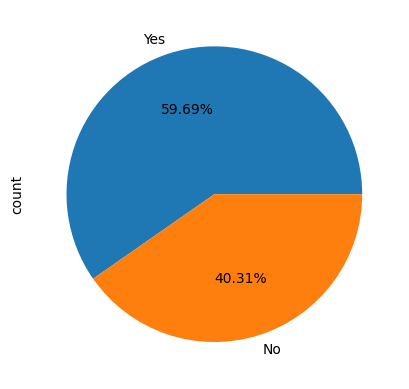

In [18]:
df['Extracurricular_Activities'].value_counts().plot(kind='pie',autopct="%1.2f%%")
#it shows that more than 50% students are involve in extracurricular activities

#(2) Numerical

C:\Users\tusha\AppData\Local\Temp\ipykernel_16360\2225905505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours_Studied'])


Text(0.5, 1.0, 'Distribution of hours studied by students')

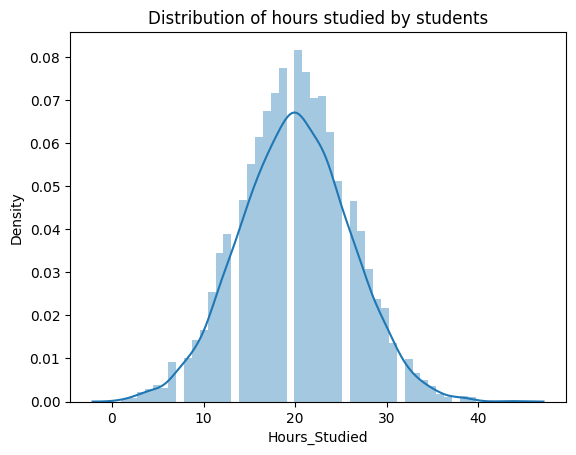

In [20]:
sns.distplot(df['Hours_Studied'])
plt.title('Distribution of hours studied by students')
#it shows that maximum students study for 20 hours

In [21]:
df['Hours_Studied'].skew()
#data of hours studied is more normally distributed

np.float64(0.016224630345704642)

C:\Users\tusha\AppData\Local\Temp\ipykernel_16360\3788470848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Attendance'])


<Axes: xlabel='Attendance', ylabel='Density'>

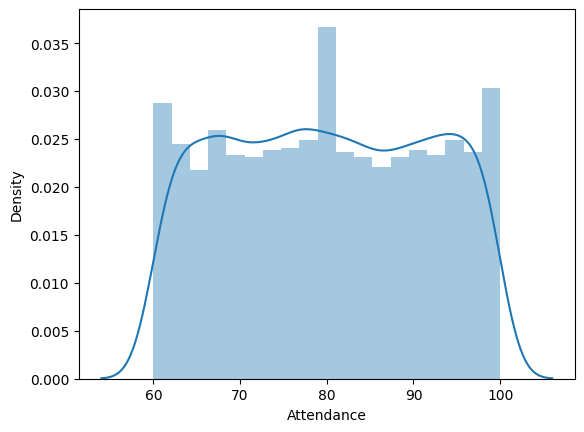

In [22]:
sns.distplot(df['Attendance'])

In [23]:
df['Attendance'].skew()
#the distribution of attendance is also normally distributed

np.float64(0.005662718901984047)

In [24]:
df['Attendance'].describe()

count    6378.000000
mean       80.020853
std        11.550723
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64

In [25]:
df['Attendance'].median()

np.float64(80.0)

Text(0.5, 1.0, 'Box Plot of cog')

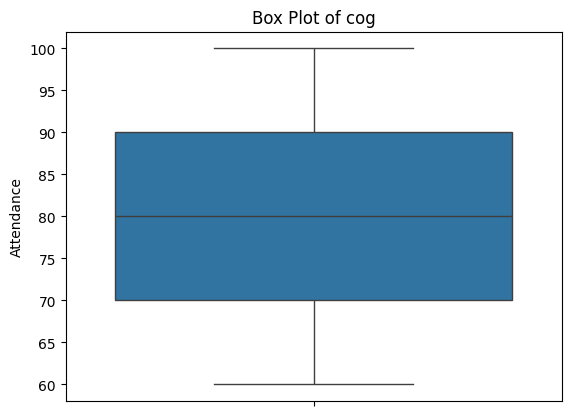

In [26]:
sns.boxplot(df['Attendance'])
plt.title('Box Plot of cog')
#the middle line in blue box denotes median of attendance
#their is no outlier

In [27]:
# The lower bound of the box denotes the 1st quartile i.e the 25% of value lies between minimum and 1st quartile value.
# The upper bound of box denotes 3rd quartile. 


#BIVERIATE ANALYSIS
# (1) Numerical-Numerical

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

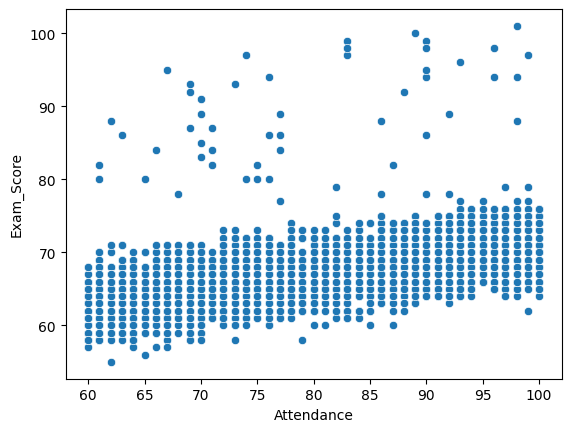

In [29]:
sns.scatterplot(data = df,x="Attendance",y="Exam_Score")
#we can see that there is no correlation betweeen attendance and exam score 

In [30]:
# Linear - Numerical and Numerical
x = df['Attendance'].to_numpy()
y = df['Exam_Score'].to_numpy()
np.corrcoef(x, y)
#there is a poor correlation betweeen Attendance and Exam Score

array([[1.        , 0.58025854],
       [0.58025854, 1.        ]])

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

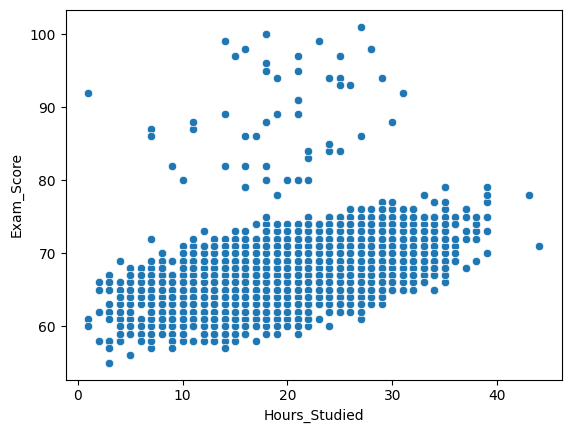

In [31]:
sns.scatterplot(data = df,y="Exam_Score",x="Hours_Studied")
#here exam score increases with study hours

In [32]:
# Linear - Numerical and Numerical
x = df['Hours_Studied'].to_numpy()
y = df['Exam_Score'].to_numpy()
np.corrcoef(x, y)
#here also a more poor correlation between hours of study and exam score

array([[1.        , 0.44510414],
       [0.44510414, 1.        ]])

# (2) Categorical -Numerical

<Axes: xlabel='Internet_Access', ylabel='Hours_Studied'>

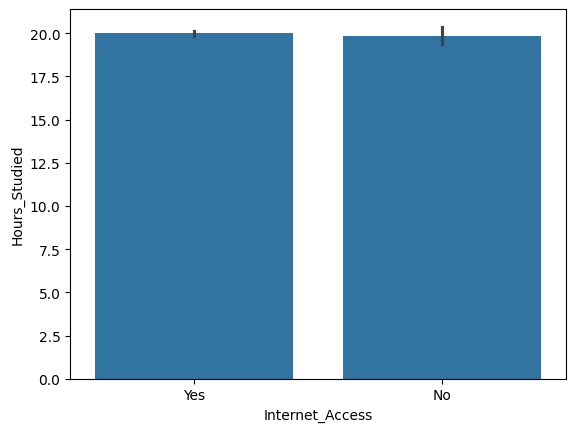

In [34]:
sns.barplot(data=df,x="Internet_Access",y="Hours_Studied")
#we can see that in both of the case (internet access) study hours are same

<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

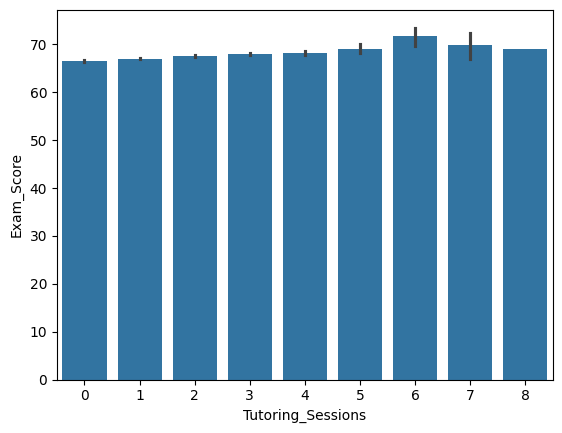

In [35]:
sns.barplot(data=df,x="Tutoring_Sessions",y="Exam_Score")
#we can see that as the tutoring sessions are increasing the exam score also increaseing

C:\Users\tusha\AppData\Local\Temp\ipykernel_16360\2506168589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Tutoring_Sessions",y="Exam_Score",palette='rainbow')


<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

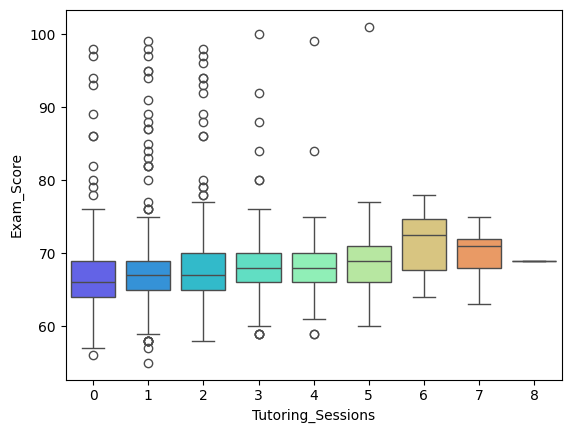

In [36]:
sns.boxplot(data=df,x="Tutoring_Sessions",y="Exam_Score",palette='rainbow')
#there are too many outliers 

C:\Users\tusha\AppData\Local\Temp\ipykernel_16360\3687893410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x="Tutoring_Sessions",y="Exam_Score",palette='rainbow')


<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

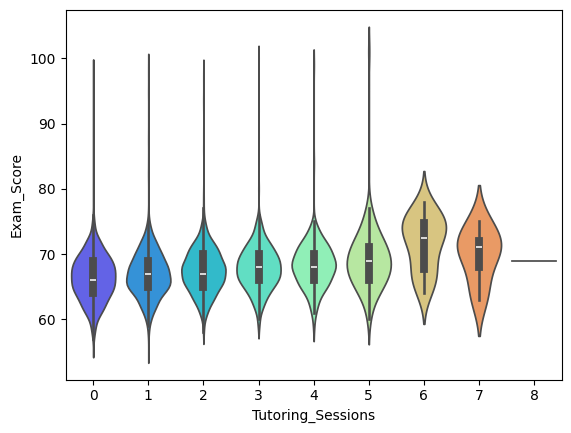

In [37]:
sns.violinplot(data=df,x="Tutoring_Sessions",y="Exam_Score",palette='rainbow')

In [38]:
# t-test - Categorical and Numerical
a = df.loc[df['Access_to_Resources'] == 'Low', 'Exam_Score'].to_numpy()
b = df.loc[df['Access_to_Resources'] == 'High', 'Exam_Score'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

TtestResult(statistic=np.float64(-13.58356988073065), pvalue=np.float64(6.828046717848538e-41), df=np.float64(3172.0))

In [39]:
# ANOVA - Categorical and Numerical
a = df.loc[df['Access_to_Resources'] == 'Low', 'Exam_Score'].to_numpy()
b = df.loc[df['Access_to_Resources'] == 'Medium', 'Exam_Score'].to_numpy()
c = df.loc[df['Access_to_Resources'] == 'High', 'Exam_Score'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

92.41635984339179 2.722170228732002e-40


<Axes: xlabel='Access_to_Resources', ylabel='Exam_Score'>

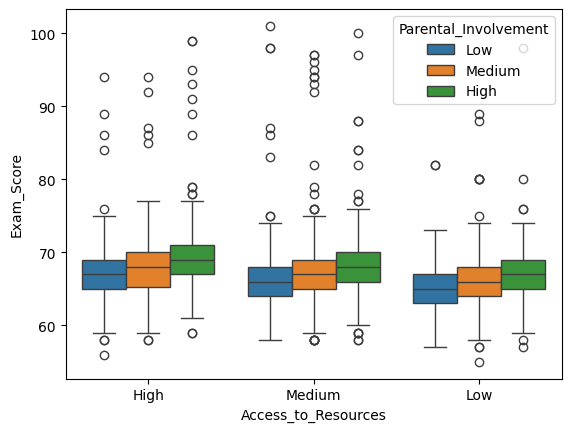

In [40]:
sns.boxplot(data=df, x="Access_to_Resources", y="Exam_Score", hue="Parental_Involvement")
#having more access to resources and parental involvement ,the student get high score in exam 

<Axes: xlabel='Teacher_Quality', ylabel='Exam_Score'>

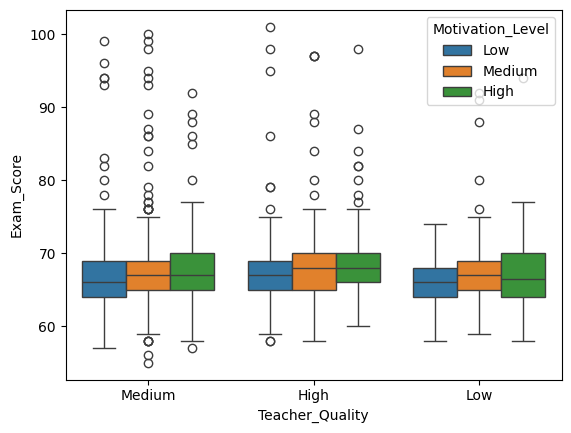

In [41]:
sns.boxplot(data=df, x="Teacher_Quality", y="Exam_Score", hue="Motivation_Level")

(3) Categorical-Categorical

In [53]:
 table=pd.crosstab(df.Family_Income, df.School_Type)

In [44]:
table

School_Type,Private,Public
Family_Income,,
High,365,865
Low,803,1779
Medium,776,1790


<Axes: xlabel='School_Type', ylabel='Family_Income'>

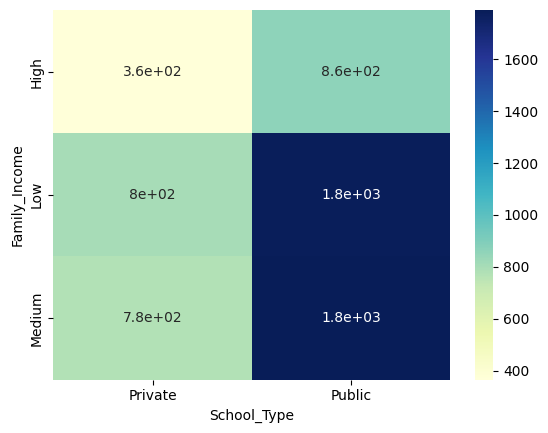

In [45]:
sns.heatmap(table, cmap="YlGnBu", annot=True, cbar=True)
#we can see that there is large number of  student from medium and low background(family income) who go to public school
#because they can't afford too much fees 

In [46]:
# Chi2 test - Categorical and Categorical

c, p, dof, expected = chi2_contingency(table) 
print(p)
print(c)
print(dof)
print(expected)

0.6333555936703696
0.9134465104256082
2
[[ 374.90122295  855.09877705]
 [ 786.98777046 1795.01222954]
 [ 782.11100659 1783.88899341]]


<Axes: xlabel='Gender'>

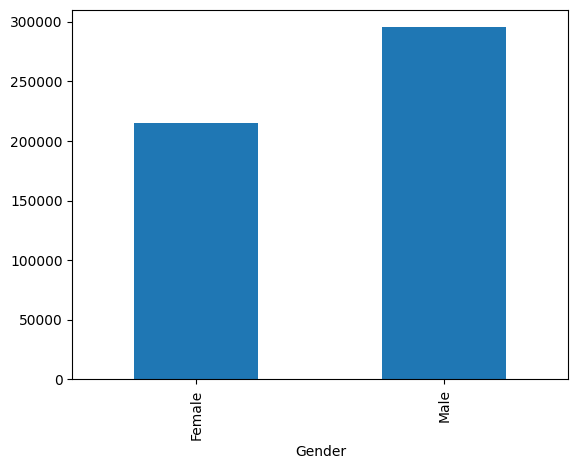

In [47]:
(df.groupby('Gender').sum()['Attendance']).plot(kind="bar")
#it shows that male students have more attendance than female students

<Axes: ylabel='Sleep_Hours'>

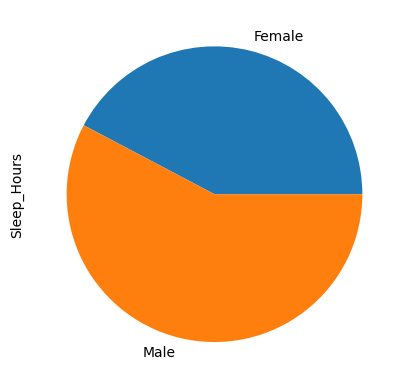

In [48]:
(df.groupby('Gender').sum()['Sleep_Hours']).plot(kind="pie")
#it shows that male students sleep more than female students

Text(0, 0.5, 'Hours_Studied')

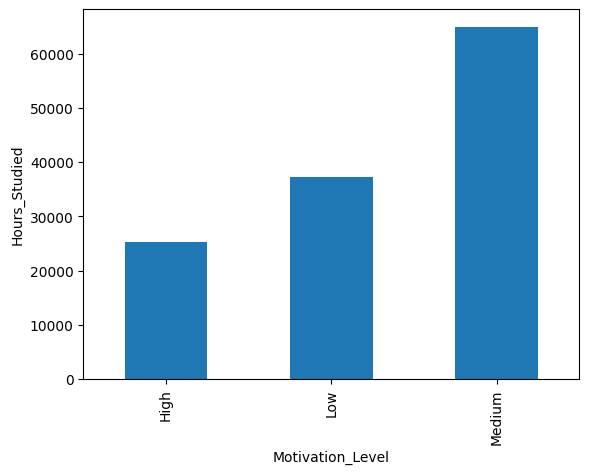

In [49]:
(df.groupby('Motivation_Level').sum()['Hours_Studied']).plot(kind="bar")
plt.xlabel('Motivation_Level')
plt.ylabel('Hours_Studied')

In [50]:
# Normalize the variables
scaler = MinMaxScaler()
df[['Hours_Studied', 'Attendance', 'Exam_Score', 'Tutoring_Sessions']] = scaler.fit_transform(df[['Hours_Studied', 'Attendance', 'Exam_Score', 'Tutoring_Sessions']])
# Check the result
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,Low,High,No,7,73,Low,Yes,0.000,Low,Medium,Public,Positive,3,No,High School,Near,Male,0.260870
1,0.418605,0.100,Low,Medium,No,8,59,Low,Yes,0.250,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,0.130435
2,0.534884,0.950,Medium,Medium,Yes,7,91,Medium,Yes,0.250,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,0.413043
3,0.651163,0.725,Low,Medium,Yes,8,98,Medium,Yes,0.125,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,0.347826
4,0.418605,0.800,Medium,Medium,Yes,6,65,Medium,Yes,0.375,Medium,High,Public,Neutral,4,No,College,Near,Female,0.326087


In [51]:
# Encode the School_Type,Parental_Education_Level variable

le = LabelEncoder()
df['School_Type'] = le.fit_transform(df['School_Type'])
df['Parental_Education_Level'] = le.fit_transform(df['Parental_Education_Level'])
# Check the result
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,Low,High,No,7,73,Low,Yes,0.000,Low,Medium,1,Positive,3,No,1,Near,Male,0.260870
1,0.418605,0.100,Low,Medium,No,8,59,Low,Yes,0.250,Medium,Medium,1,Negative,4,No,0,Moderate,Female,0.130435
2,0.534884,0.950,Medium,Medium,Yes,7,91,Medium,Yes,0.250,Medium,Medium,1,Neutral,4,No,2,Near,Male,0.413043
3,0.651163,0.725,Low,Medium,Yes,8,98,Medium,Yes,0.125,Medium,Medium,1,Negative,4,No,1,Moderate,Male,0.347826
4,0.418605,0.800,Medium,Medium,Yes,6,65,Medium,Yes,0.375,Medium,High,1,Neutral,4,No,0,Near,Female,0.326087


In [52]:
# Scale the variables
scaler = StandardScaler()
df[['Hours_Studied', 'Attendance', 'Exam_Score', 'Tutoring_Sessions']] = scaler.fit_transform(df[['Hours_Studied', 'Attendance', 'Exam_Score', 'Tutoring_Sessions']])

# Check the result
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0       0.505079    0.344520                  Low                High   
1      -0.163260   -1.387109                  Low              Medium   
2       0.672163    1.556661               Medium              Medium   
3       1.507587    0.777428                  Low              Medium   
4      -0.163260    1.037172               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
CONCLUSION
1. We have successfully removed all the null values in our dataset.
2. approx. 29% student's parental involvement is high and they are scoring high exam scores .
3. we have seen that there is poor correlation between the attendance and exam score .
4. we have successfully performed the t_test ,chi_square test and anova test on appropriate attributes .
5. we have aslo perform the preprocessing techniques like labelencoding ,minmaxscaler and standerdscaler .
6. we have seen several relations among different columns which are mentioned in 